#4.Hãy vẽ biểu đồ mô tả mối quan hệ giữa trọng lượng và giá kim cương trong tập dữ liệu diamonds của thư viện seaborn

In [1]:
#khai báo các thư viện cần thiết
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#nạp dữ liệu
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


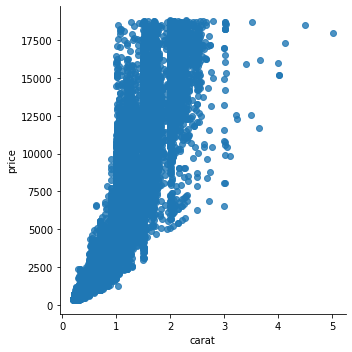

In [2]:
sns.lmplot(x='carat', y='price',fit_reg=False, data = df)

#Sử dụng seaborn

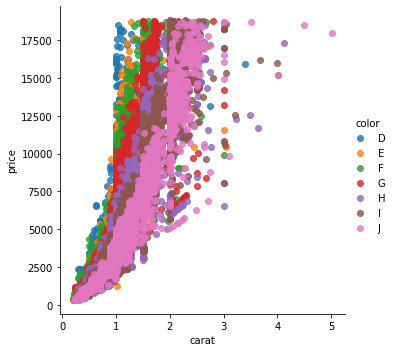

In [3]:
# biểu đồ phân tán trọng lượng(carat) và giá(price) kim cương cho mỗi màu(color)
sns.lmplot(x='carat', y='price', hue='color', fit_reg = False, data = df)
#fig_reg=False: ngăn việc thực hiện 1 số hồi quy
#hue='color': phân chia và vẽ dựa trên các giá trị duy nhất trong color

#Sử dụng matplotlib

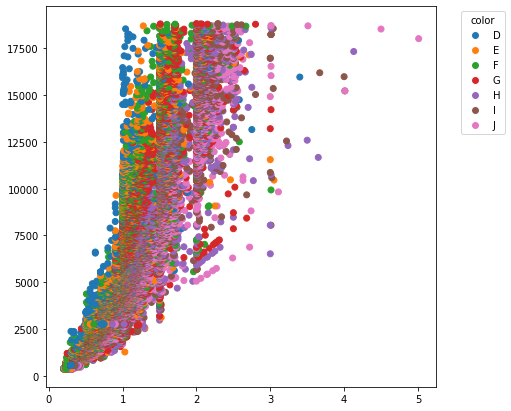

In [4]:
from matplotlib.lines import Line2D  
fig, ax = plt.subplots(figsize=(7,7))
colors = {'D':'tab:blue',
          'E':'tab:orange',
          'F':'tab:green',
          'G':'tab:red',
          'H':'tab:purple',
          'I':'tab:brown',
          'J':'tab:pink'}
ax.scatter(df['carat'], df['price'], c = df['color'].map(colors))
#đối số c: ánh xạ các color của kim cương với các màu để vẽ biểu đồ
#legend
handles = [Line2D([0],[0], marker='o', color='w', markerfacecolor = v, label = k, markersize = 8) for k,v in colors.items()]
ax.legend(title='color', handles = handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#Sử dụng Pandas
#pandas.DataFrame.groupby
#pandas.DataFrame.plot

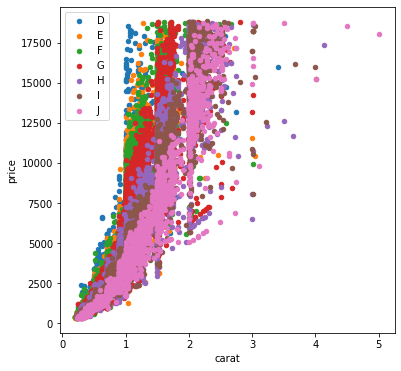

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
#gom nhóm theo color
grouped = df.groupby('color')
'''colors = {'D':'tab:blue',
            'E':'tab:orange',
            'F':'tab:green',
            'G':'tab:red',
            'H':'tab:purple',
            'I':'tab:brown',
            'J':'tab:pink'}'''
for key, group in grouped:
  #gán màu theo cách thủ công
  #print(key)
  #print(group)
  group.plot(ax=ax, kind='scatter', x='carat', y='price',
            label=key, color=colors[key])
plt.show()

#plotnine
#ggplot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


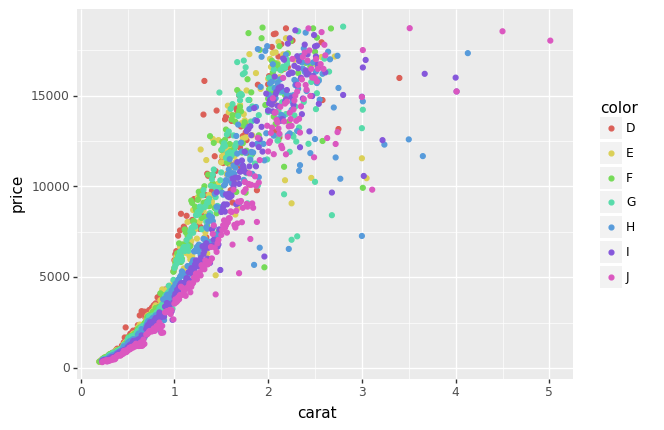

<ggplot: (8726507688025)>

In [6]:
from plotnine import *
ggplot(df, aes(x='carat', y='price', color='color'))+ geom_point(stat='summary')